## Исследование данных о российском кинопрокате



Данное исследование проведено для Министерства культуры Российской Федерации и основывается на данных о выданных в стране прокатных удостоверениях, сборах и государственной поддержке фильмов, размещенных Министерством культуры в открытом доступе, а также информации с сайта КиноПоиск.

**Цель исследования:** 

Изучить рынок российского кинопроката и тенденции отрасли, исследовать сегмент фильмов, снятых при государственной поддержке.

**Ход исследования**
1. Создание единого датафрейма.

2. Предобработка данных
 
 2.1. Изменение типов данных
 
 2.2. Изучение пропусков в датафрейме
 
 2.3. Изучение дубликатов в датафрейме
 
 2.4. Изучение категориальных значений
 
 2.5. Проверка количественных значений
 
3. Исследовательский анализ данных


4. Исследование фильмов с государственной поддержкой

  4.1 Все фильмы с государственной поддержкой

  4.2 Фильмы, не окупившиеся в прокате

  4.3 Фильмы с господдержкой, окупившиеся в прокате
 

5. Общие выводы

### 1. Создание единого датафрейма. 

Объединим данные из двух источников в один датафрейм для дальнейшей обработки и исследования. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

pd.set_option('float_format', '{:f}'.format)

In [5]:
data1=pd.read_csv('mkrf_movies.csv', decimal=',')
data2=pd.read_csv('mkrf_shows.csv')

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null object
nonrefundable_support    332 non-null object
budget                   332 non-null object
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: object(15)
memory usage: 877.4+ KB


In [7]:
data1.query('puNumber == "нет"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data1=data1.query('puNumber != "нет"') 
# для дальнейшей работы с df необходимы данные, в том числе номер прокатного удостоверения
# стоит удалить строку, где отсутствуют важные для нас сведения

In [9]:
data1['puNumber']=data1['puNumber'].astype('int')

In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [11]:
data = data1.merge(data2, on = 'puNumber', how = 'left')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
title                    7485 non-null object
puNumber                 7485 non-null int32
show_start_date          7485 non-null object
type                     7485 non-null object
film_studio              7467 non-null object
production_country       7483 non-null object
director                 7476 non-null object
producer                 6917 non-null object
age_restriction          7485 non-null object
refundable_support       332 non-null object
nonrefundable_support    332 non-null object
budget                   332 non-null object
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(1), int32(1), object(14)
memory usage: 964.9+ KB


In [13]:
data.sample(5, random_state=42)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2826,Рок на Востоке,121022615,2015-11-09T12:00:00.000Z,Художественный,"Дьюн Филмз, Квед Интертейнмент, Шангри-Ла Инте...",США,Барри Левинсон,"Стив Бинг, Билл Блок, Митч Глейзер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.6,"комедия,военный,музыка",1337996.900000
6956,Тайная жизнь домашних животных 2,124003519,2019-05-25T12:00:00.000Z,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз","США, Франция, Япония",Крис Рено,Лиз-Мари Амар,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.8,"мультфильм,комедия,приключения",1478921168.460000
3014,Братья из Гримсби,121004116,2016-02-24T12:00:00.000Z,Художественный,"Биг Толк Продакшнз, Коламбиа Пикчерз, Фор бай ...",США,Луи Летеррье,"Саша Барон Коэн, Нира Парк",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.4,"боевик,триллер,комедия",140501616.000000
6569,Позвоните Мышкину,111025718,2018-12-25T12:00:00.000Z,Художественный,"ООО ""ТПО ""РОК""",Россия,И.Казанков,"А.Учитель, К.Саксаганская",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.3,комедия,nan
4606,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221160510,2010-12-17T12:00:00.000Z,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",nan


Объединенный датафрейм включает 7485 строк и 16 колонок, многие из которых содержат пропуски. Кроме того, многие колонки, содержащие цифровые данные имеют тип object, что не позволит проводить расчеты. Датафрейм требует предобработки.

### 2. Предобработка данных

#### 2.1. Изменение типов данных

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
title                    7485 non-null object
puNumber                 7485 non-null int32
show_start_date          7485 non-null object
type                     7485 non-null object
film_studio              7467 non-null object
production_country       7483 non-null object
director                 7476 non-null object
producer                 6917 non-null object
age_restriction          7485 non-null object
refundable_support       332 non-null object
nonrefundable_support    332 non-null object
budget                   332 non-null object
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(1), int32(1), object(14)
memory usage: 964.9+ KB


In [15]:
# преобразуем колонку с датой премьеры в формат datetime
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
# заменим тип данный в колонках с рейтингом, бюджетом и данными о суммах господдержки
data[['ratings', 'refundable_support', 'nonrefundable_support', 'budget']] = data[['ratings', 'refundable_support', 'nonrefundable_support', 'budget']].apply(pd.to_numeric, errors='coerce' )

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
title                    7485 non-null object
puNumber                 7485 non-null int32
show_start_date          7485 non-null datetime64[ns, UTC]
type                     7485 non-null object
film_studio              7467 non-null object
production_country       7483 non-null object
director                 7476 non-null object
producer                 6917 non-null object
age_restriction          7485 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6490 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns, UTC](1), float64(5), int32(1), object(9)
memory usage: 964.9+ KB


Мы изменили типы в колонках с датой и числовыми значениями, чтобы было легче работать с данными дальше.

#### 2.2. Изучение пропусков в датафрейме

In [18]:
for column in data.columns:
    print(column, data[column].isna().mean())

title 0.0
puNumber 0.0
show_start_date 0.0
type 0.0
film_studio 0.002404809619238477
production_country 0.0002672010688042752
director 0.0012024048096192384
producer 0.07588510354041417
age_restriction 0.0
refundable_support 0.9556446225784904
nonrefundable_support 0.9556446225784904
budget 0.9556446225784904
financing_source 0.9556446225784904
ratings 0.13293253173012692
genres 0.13026052104208416
box_office 0.5780895123580494


In [19]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

Больше всего пропусков в блоке столбцов, относящихся к господдержке, пропуски - фильмы ее не получившие. Пропуски в сборах - результат объединения датафайлов: data2 содержал меньше строк, все строки из data1, которых не было во 2 датафрейме получили пропуск.

Если основываться на положении о том, что во 2 дата былиисчерпывающие данные обо всех фильмах, которые шли в кино в исследуемые годы, можно предположить, что данные фильмы могли не выйти в кино-прокат, но получили удостоверение. Оставим так. Посмотрим на колонку студии.

In [20]:
data[data['film_studio'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.300000,комедия,nan
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,4.000000,"мультфильм,комедия",nan
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,nan,nan,nan,NaN,nan,NaN,nan
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,nan,nan,nan,NaN,nan,NaN,nan
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan
6379,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,41225.000000
6484,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.900000,"драма,криминал,детектив",nan
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan
6496,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan


Строки с пропусками в наименовании студии имеют и пропуски в сборах, а также в большинстве своем относятся к документальным и научно-популярным фильмам. Исправлять не будем, примем к сведению.

In [21]:
data[data['production_country'].isna()].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,7.200000,"детский,комедия",194527.000000
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,4.000000,"мультфильм,комедия",nan


Обе строки относятся к российскому производству, можем добавить значения вручную

In [22]:
data['production_country'] = data['production_country'].fillna('Россия')

Изучим столбец с указанием режиcсера

In [23]:
data[data['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,44350.000000
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,nan
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,nan
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,7.900000,"концерт,музыка",nan
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,4.000000,"мультфильм,комедия",nan
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,nan
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,6.700000,"концерт,музыка",nan


Почти все строки с пропусками в имени режиссера - записи концертов, у которых нет кинорежиссера, поэтому считаю, что эти пропуски лучше заменить значением unknown.

In [24]:
data['director'] = data['director'].fillna('unknown')

In [25]:
data[data['director'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Изучим пропуски в именах продюсеров

In [26]:
data[data['producer'].isna()].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.600000,"драма,военный",nan
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,7.700000,драма,nan
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.300000,"мелодрама,комедия",2700.000000
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,7.800000,"мелодрама,комедия",nan
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,7.800000,"боевик,драма,приключения",nan
15,Председатель,111014916,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.300000,драма,nan
16,Осенний марафон,111007513,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Данелия,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.000000,"драма,мелодрама,комедия",nan
17,Осень,111027914,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Смирнов,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,7.400000,"драма,мелодрама",nan
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,8.000000,"мелодрама,комедия",360.000000
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,7.700000,драма,420.000000


In [27]:
data[data['producer'].isna()].query('production_country == "СССР" or type == "Документальный"').count()

title                    352
puNumber                 352
show_start_date          352
type                     352
film_studio              352
production_country       352
director                 352
producer                   0
age_restriction          352
refundable_support         0
nonrefundable_support      0
budget                     0
financing_source           0
ratings                  331
genres                   331
box_office                70
dtype: int64

Можно предположить, что пропуски в продюсере в большинстве случаев в тех фильмах, где продюсера может не быть, в частности в старых или документальных картинах.

In [28]:
data[data['genres'].isna()].query('type == "Прочие" or type == "Анимационный" or type == "Документальный"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
411,Пьетро Масканьи. Сельская честь /По одноименно...,126001812,2012-05-29 12:00:00+00:00,Прочие,Эр А И Синема,Италия,Марио Мартоне,Ла Скала,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,nan
412,Опера на льду,126001712,2012-05-29 12:00:00+00:00,Прочие,Нексо Диджитал,Италия,Кристиан Биодани,"Джиглиола Барбьери, Паоло де Биаси",«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,nan
427,Франческо Чилеа. Адриана Лекуврёр /По одноимен...,126000412,2012-02-07 12:00:00+00:00,Прочие,Опус Арте,Великобритания,Дэвид Маквикар,Дэвид Гроувс,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,nan
443,Артур Сеймур Салливан. Микадо. Постановка Sydn...,126000212,2012-01-27 12:00:00+00:00,Прочие,Синема Лайв,Австралия,Стюарт Маундер,Синема Лайв,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,nan
444,"Три тенора: Лучано Паваротти, Пласидо Доминго ...",126000312,2012-01-27 12:00:00+00:00,Прочие,Декка,Италия,Брайан Лардж,Герберт Чаппелл,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461,МУЛЬТ в кино. Выпуск № 109,114004919,2019-12-21 12:00:00+00:00,Анимационный,"ООО ""Мульт в кино""",Россия,П.Смирнов,П.Смирнов,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,NaN,nan
7469,Дикие и свободные,112004819,2019-12-23 12:00:00+00:00,Документальный,"АНО ""ТВ-Новости""",Россия,Н.Карачкова,В.Сенина,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,nan,NaN,nan
7479,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,219569.000000
7480,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,NaN,nan


582 из 975 строк с пропусками в жанре - это картины с неустановленным типом (в частности детские), а также анимационные и документальные фильмы. Удалять или заменять эти пропуски нет смысла, однако предлагаю заменить их значением unknown.

In [29]:
data['genres'] = data['genres'].fillna('unknown')

In [30]:
data[data['ratings'].isna()].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,unknown,nan
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,nan,unknown,nan
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,nan,unknown,nan
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,unknown,nan
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,nan,unknown,nan
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,nan,"ужасы,триллер,драма",nan
264,Разбойник и принцесса /По мотивам сказок Карел...,224010714,2014-08-28 12:00:00+00:00,Художественный,Чешское телевидение,Чехия,Карел Смычек,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,unknown,nan
411,Пьетро Масканьи. Сельская честь /По одноименно...,126001812,2012-05-29 12:00:00+00:00,Прочие,Эр А И Синема,Италия,Марио Мартоне,Ла Скала,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,unknown,nan
412,Опера на льду,126001712,2012-05-29 12:00:00+00:00,Прочие,Нексо Диджитал,Италия,Кристиан Биодани,"Джиглиола Барбьери, Паоло де Биаси",«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,unknown,nan
427,Франческо Чилеа. Адриана Лекуврёр /По одноимен...,126000412,2012-02-07 12:00:00+00:00,Прочие,Опус Арте,Великобритания,Дэвид Маквикар,Дэвид Гроувс,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,unknown,nan


В строках без рейтинга отсутствуют и данные о жанре и сборах. Либо данные неполные, либо это фильмы, которые не шли в прокате или шли в рамках другого прокатного удостоверения. Лучше не заменять эти пропуски.

In [31]:
for column in data.columns:
    print(column, data[column].isna().mean())

title 0.0
puNumber 0.0
show_start_date 0.0
type 0.0
film_studio 0.002404809619238477
production_country 0.0
director 0.0
producer 0.07588510354041417
age_restriction 0.0
refundable_support 0.9556446225784904
nonrefundable_support 0.9556446225784904
budget 0.9556446225784904
financing_source 0.9556446225784904
ratings 0.13293253173012692
genres 0.0
box_office 0.5780895123580494


Мы нашли причины пропускам в датафрейме и заменили их там, где это возможно без вреда массиву данных и их объективности.

#### 2.3. Изучение дубликатов в датафрейме

In [32]:
#проверим на явные дубликаты
data.duplicated().sum() 

0

Так как каждый фильм может иметь несколько прокатных удостоверений для разных сетей и разного использования, но один и тот же номер два фильма иметь не могут, проверим, не повтоятюся ли номера удостоверений.

In [33]:
data['puNumber'].value_counts()

221054410    2
221154310    2
114001919    1
124001617    1
111005011    1
            ..
121034419    1
112025418    1
111008518    1
121000711    1
122001411    1
Name: puNumber, Length: 7483, dtype: int64

In [34]:
data.query('puNumber == 221054410')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.400000,"комедия,криминал",nan
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.800000,"комедия,криминал",nan


Причина дубликата - разное написание в графах production_country и director producer, а также другая метка age_restriction и рейтинг. На Кинопоиске первый вариант данных, оставим его, дубликат удалим.

In [35]:
data.drop(data.index[[5067]], inplace=True)

In [36]:
data.query('puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.000000,"мелодрама,комедия",nan
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.600000,"драма,мелодрама,история",nan


Разные фильмы под одним номером. Обе картины не имеют данных о сборах, кроме того, они не входят в цель исследования (не российского производства и не имели господдержки), поэтому лучше удалить обе эти строки.

In [37]:
data.drop(data.index[[4637, 4638]], inplace=True)
data.query('puNumber == 221154310')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Мы удалили 3 строки датасета, которые признали дубликатами.

По идее уникальными должны быть и названия фильмов, проверим их на дубликаты.

In [38]:
data['title'].value_counts().head(25)

День святого Валентина_                                        5
Дорога /По новелле Кормака МкКарфи/                            4
Робин Гуд (Robin Hood)                                         4
Непокоренный.                                                  4
Не брать живым /По книге Раджива Чандрасекарана/               4
Рапунцель: Запутанная история                                  4
Дитя тьмы                                                      4
Красавчик-2                                                    4
Двойной копец                                                  4
Прощание                                                       4
Секс в большом городе 2                                        4
Кошмар на улице Вязов /Фильм ужасов/                           4
Белая мгла /По комиксу Грега Рукка и Стива Либера/             4
Кошки против собак: Месть Китти Галор                          4
Белоснежка и охотник                                           4
Код доступа "Кейптаун"   

In [39]:
data.query('title == "День святого Валентина_"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3901,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.700000,"мелодрама,комедия",nan
3990,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.700000,"мелодрама,комедия",nan
4069,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.700000,"мелодрама,комедия",nan
4195,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.700000,"мелодрама,комедия",nan
5069,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.700000,"мелодрама,комедия",nan


In [40]:
data.query('title == "Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
371,Гарри Поттер и Дары Смерти - Часть 1/По роману...,121026516,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,8.100000,"фэнтези,драма,детектив",745510.000000
4197,Гарри Поттер и Дары Смерти - Часть 1/По роману...,121021010,2010-11-11 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,8.100000,"фэнтези,драма,детектив",1700.000000
4525,Гарри Поттер и Дары Смерти - Часть 1/По роману...,221144910,2010-12-10 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,8.100000,"фэнтези,драма,детектив",nan
5056,Гарри Поттер и Дары Смерти - Часть 1/По роману...,221068911,2011-05-18 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,8.100000,"фэнтези,драма,детектив",nan


Считаю, что эти повторы не стоит считать полными дублями, так как они имеют уникальные прокатные удостверения, которые (как мы видим по Гарри Поттеру) могли выдаваться в разные годы. Согласно порядку выдачи прокатных удостоверений, новый документ выдается отдельным прокатным сетям, вещательным компаниям, распространителям на материальном носителе. Кроме того, новое удостоверение будет, например, у лент, прошедших ремастеринг. В случае, когда новое прокатное удостоверение выдавалось разным сетям проката, каждое удостоверение будет иметь свои данные о сборах, поэтому считаю правильным не удалять фильмы с дублирующимся названиями.

#### 2.4. Изучение категориальных значений


<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [41]:
data['title'].unique()

array(['Открытый простор', 'Особо важное задание', 'Особо опасен', ...,
       'Щенячий патруль: Скорей спешим на помощь!',
       'Машины песенки. Серия "Испанские мотивы"',
       'Машины песенки. Серия "Когда цветут кактусы"'], dtype=object)

Колонка названий фильмов содержит слишком много уникальных названий, проблем в написании имен фильмов не наблюдается.

In [42]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Удалим пробелы в начале строки.

In [43]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [44]:
data['age_restriction'].unique() # проблем в категориях не обнаружено

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [45]:
data['film_studio'].sort_values().unique()

array([' АНО "Кинофорум"',
       ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
       ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
       ...,
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс', nan], dtype=object)

In [46]:
# Удалим пробелы в начале строки. 
#Приводить транскрибированные названия к единому написанию не имеет смысла, слишком много уникальных названий.
data['film_studio'] = data['film_studio'].str.strip()
data['film_studio'].sort_values().unique()

array(['"Дино де Лаурентиис" (Италия) при участии Киностудии "Мосфильм"',
       '"Союздетфильм", "Мосфильм", "Москинокомбинат"',
       '"Студия "Птица Феникс" Татьяны Новиковой', ...,
       'совместное производство Киностудия "Мосфильм", "Космос-филм" (Франция), "Посейдон Продакшинз Лимитед" (Англия), "ИКАИК" (Куба), ДЕФА (ГДР)',
       'юФилм, Твинпикс', nan], dtype=object)

In [47]:
data['financing_source'].sort_values().unique()

array(['Министерство культуры', 'Министерство культуры, Фонд кино',
       'Фонд кино', nan], dtype=object)

In [48]:
data['genres'].sort_values().unique()

array(['unknown', 'аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', '

In [49]:
# Необходимо добавить пробелы после запятой
data['genres'] = data['genres'].apply(lambda rp: rp.replace(',',', '))
data['genres'].sort_values().unique()

array(['unknown', 'аниме, мультфильм', 'аниме, мультфильм, боевик',
       'аниме, мультфильм, детектив', 'аниме, мультфильм, драма',
       'аниме, мультфильм, комедия', 'аниме, мультфильм, короткометражка',
       'аниме, мультфильм, мелодрама', 'аниме, мультфильм, приключения',
       'аниме, мультфильм, ужасы', 'аниме, мультфильм, фантастика',
       'аниме, мультфильм, фэнтези', 'биография',
       'биография, военный, драма', 'биография, документальный',
       'биография, драма', 'биография, драма, военный',
       'биография, драма, история', 'биография, драма, криминал',
       'биография, история', 'биография, история, драма',
       'биография, криминал, драма', 'биография, криминал, триллер',
       'биография, мелодрама, драма', 'биография, музыка, драма',
       'биография, музыка, мюзикл', 'биография, спорт, драма',
       'биография, спорт, история', 'биография, спорт, комедия', 'боевик',
       'боевик, вестерн, приключения', 'боевик, военный',
       'боевик, военный,

Основной проблемой категориальных значений стали пробелы. Убрали пробелы в типе и киностудиях, добавили пробелы после запятой в жанрах кинолент.
В большинстве категориальных столбцов есть проблема отсутствия единообразия: разнится написание одних и тех же названий, присутствуют списки - это усложняет работу с данными. Стоит привести колонки типов и жанров, транскрибирование имен и названия киностудий к одному виду. 

#### 2.5. Проверка количественных значений

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [50]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7482.000000,332.000000,332.000000,332.000000,6487.000000,3158.000000
mean,135162135.105186,11864457.831325,48980988.891566,127229716.683735,6.478943,76478696.161219
std,38321983.297644,24916555.263644,59980117.923301,188588333.115158,1.101805,240353122.823240
min,1811096.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,112025043.000000,0.000000,25000000.000000,42000000.000000,5.900000,86239.000000
50%,121015418.500000,0.000000,30000000.000000,68649916.000000,6.600000,2327987.550000
75%,124003288.750000,15000000.000000,40375000.000000,141985319.500000,7.200000,23979671.025000
max,231001111.000000,180000000.000000,400000000.000000,2305074303.000000,9.200000,3073568690.790000


Для удобства дальнейших расчетов и проведения исследования создадим колонку support, которая станет суммой возвратных и невозвратных средств господдержки

In [51]:
data['support'] = data['nonrefundable_support'] + data['refundable_support']

In [52]:
# посмотрим на фильмы, бюджет которых меньше суммы поддержки
data.query('budget <= support')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.000000,23000000.000000,0.000000,"Министерство культуры, Фонд кино",6.600000,мелодрама,10234016.100000,23000000.000000
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.000000,75000000.000000,0.000000,Фонд кино,6.600000,драма,446163511.000000,75000000.000000
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.000000,70000000.000000,0.000000,Фонд кино,7.800000,"боевик, драма, криминал",196572438.400000,80000000.000000
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.000000,0.000000,0.000000,Фонд кино,6.200000,"комедия, фэнтези",67418974.800000,20000000.000000
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.000000,100000000.000000,0.000000,Фонд кино,4.600000,"мультфильм, приключения, фэнтези",184487551.400000,160000000.000000
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.000000,59000000.000000,0.000000,Фонд кино,6.300000,"комедия, драма",1957738.510000,59000000.000000
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.000000,35000000.000000,0.000000,Фонд кино,5.100000,"комедия, мелодрама",72937783.200000,35000000.000000
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.000000,6000000.000000,0.000000,Министерство культуры,4.300000,комедия,15362931.430000,6000000.000000
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.000000,51000000.000000,0.000000,Фонд кино,6.300000,"комедия, мелодрама",70299052.000000,70000000.000000
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.000000,250000000.000000,0.000000,Фонд кино,5.600000,фантастика,1038321489.000000,250000000.000000


Во всех 17 строках не указан бюджет. Исходя из открытых данных бюджет данных фильмов превышает 0, поэтому заменить значения 0 нет смысла, а средние значения исказят данные. Нужно либо внести данные вручную либо удалить строки из выборки. Выборка фильмов с господдержкой содержит 332 строки, 17 строк с отсутствующими данными о бюджете - это чуть более 5%, поэтому лечше их удалить.

In [53]:
data.drop(data[data.budget <= data.support].index,inplace=True)

In [54]:
data['box_office'].describe()

count         3141.000000
mean      76009674.776154
std      240250266.231155
min              0.000000
25%          83950.000000
50%        2284862.000000
75%       23441120.000000
max     3073568690.790000
Name: box_office, dtype: float64

Много подозрительно маленьких и больших значений в сумме сборов, стоит на них посмотреть

In [55]:
data.query('box_office < 100000').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.300000,"мелодрама, комедия",2700.000000,nan
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,8.000000,"мелодрама, комедия",360.000000,nan
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,7.700000,драма,420.000000,nan
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,8.700000,"комедия, мелодрама, криминал",380.000000,nan
38,Мужики!..,111007213,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,8.100000,драма,1165.000000,nan
47,Андрей Рублев.,111029814,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Тарковский,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.200000,"драма, биография, история",22660.000000,nan
50,Асса,111005815,2015-04-23 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,С.Соловьев,NaN,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.000000,"фэнтези, боевик",84720.000000,nan
52,Айболит - 66,111010513,2013-12-19 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ролан Быков,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,7.100000,"мюзикл, комедия, детский",1795.000000,nan
61,Американская дочь,111005515,2015-04-23 12:00:00+00:00,Художественный,"АО ""Караван"", Компания ""Америкен Дистрибьюшн"",...","Россия, Казахстан, США",К.Шахназаров,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,7.000000,"драма, комедия",300.000000,nan
64,Аттестат зрелости,111005915,2015-04-23 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Т.Лукашевич,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.900000,драма,67500.000000,nan


In [56]:
data.query('box_office < 100000 and support > 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000000,26000000.000000,37142857.000000,Министерство культуры,nan,unknown,28140.000000,26000000.000000
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000000,28000000.000000,40574140.000000,Министерство культуры,4.200000,драма,55917.500000,28000000.000000
1911,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.000000,34000000.000000,48571430.000000,Министерство культуры,7.400000,"фэнтези, приключения, драма",51907.500000,34000000.000000
2149,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30 12:00:00+00:00,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,«18+» - запрещено для детей,0.000000,25000000.000000,37371262.000000,Министерство культуры,nan,unknown,19820.000000,25000000.000000
2168,Трагедия в бухте Роджерс,111003215,2015-03-26 12:00:00+00:00,Художественный,"ООО ""Валдай""",Россия,Ф.Абрютин,"С.Кучмаева, С.Зернов",«12+» - для детей старше 12 лет,0.000000,30000000.000000,43000000.000000,Министерство культуры,6.100000,"детектив, история, драма",40050.000000,30000000.000000
2378,Экспириенс,111000315,2015-01-13 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,Е.Татаров,А.Тютрюмов,«16+» - для детей старше 16 лет,0.000000,26000000.000000,37142857.000000,Министерство культуры,4.700000,драма,36550.000000,26000000.000000
2396,Небесный верблюд,111000115,2015-01-14 12:00:00+00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.000000,34000000.000000,49280496.000000,Министерство культуры,6.700000,"детский, семейный",61040.000000,34000000.000000
2488,Последний вагон. Весна,111004115,2015-04-15 12:00:00+00:00,Художественный,"ООО ""ТАН Фильм""",Россия,А.Калинкин,"Д.Ефремов, В.Пономаренко",«18+» - запрещено для детей,0.000000,25000000.000000,35760060.000000,Министерство культуры,5.100000,триллер,61193.000000,25000000.000000
2526,Вдвоем на льдине.,111011015,2015-06-25 12:00:00+00:00,Художественный,"ООО ""Первое творческое объединение""",Россия,"Н.Джорджадзе, В.Игнатьев","П.Поляков, И.Букреев",«12+» - для детей старше 12 лет,0.000000,26500000.000000,37943652.000000,Министерство культуры,6.600000,мелодрама,4450.000000,26500000.000000
2802,Битва с экстрасенсами,111011315,2015-07-20 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",Россия,И.Кордзаия,Е.Мелентьев,«12+» - для детей старше 12 лет,0.000000,25900000.000000,59560746.000000,"Министерство культуры, Фонд кино",5.400000,"фэнтези, приключения",6000.000000,25900000.000000


Фильмы с низкими сборами - в большинстве своем старые, произведенные в СССР и 90-е, однако, есть среди них и те, которые были спонсированы госфондами, но провалились в прокате. Например, фильм БЕРЦЫ 2014 года получил в качестве поддержки 28 млн рублей, но его посмотрело всего 118 человек. Думаю, такие картины показательны для нашего исследования и стоит их оставить.

In [57]:
data.query('box_office > 700000000 and support > 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support
2919,Экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50000000.000000,392104482.000000,635283867.000000,Фонд кино,7.600000,"драма, триллер, приключения",1402255390.000000,442104482.000000
3104,Иван Царевич и Серый Волк 3,114004115,2015-12-24 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,Д.Шмидт,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,0.000000,40000000.000000,179257987.000000,Фонд кино,6.200000,"мультфильм, приключения, семейный",704928216.000000,40000000.000000
5501,Салют-7,111006917,2017-10-01 12:00:00+00:00,Художественный,"ООО ""Лемон Филмз Студио""",Россия,К.Шипенко,"С.Сельянов, Б.Бакурадзе, А.Златопольский",«12+» - для детей старше 12 лет,0.000000,225000000.000000,493733957.000000,Фонд кино,7.400000,"драма, приключения, триллер",752679777.000000,225000000.000000
5504,Последний богатырь,111007017,2017-10-19 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000000.000000,50000000.000000,352477575.000000,Фонд кино,6.800000,"комедия, фэнтези, приключения",1655037688.000000,100000000.000000
5640,Ёлки Новые,111011617,2017-12-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,50000000.000000,50000000.000000,174381922.000000,Фонд кино,5.800000,"комедия, мелодрама",855451052.000000,100000000.000000
5652,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.000000,400000000.000000,590192191.000000,Фонд кино,7.500000,"спорт, драма",2779686144.000000,400000000.000000
5658,Три богатыря и принцесса Египта,114003317,2017-12-21 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Феоктистов,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,50000000.000000,0.000000,174464395.000000,Фонд кино,5.500000,"мультфильм, приключения, семейный",759226773.000000,50000000.000000
5707,Лёд,111000518,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000000.000000,60000000.000000,148585222.000000,Фонд кино,nan,unknown,1445731797.890000,85000000.000000
5825,Тренер,111003218,2018-04-19 12:00:00+00:00,Художественный,"ООО ""ДК интертеймент"", ООО ""Киностудия ""Слово""...",Россия,Д.Козловский,"Д.Козловский, П.Ануров, Л.Верещагин, А.Златопо...",«12+» - для детей старше 12 лет,0.000000,260000000.000000,390191139.000000,Фонд кино,6.800000,"драма, спорт",820528005.210000,260000000.000000
6508,Ёлки Последние,111023918,2018-12-10 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник...","Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,75000000.000000,25000000.000000,179708770.000000,Фонд кино,6.900000,комедия,701507030.270000,100000000.000000


Даже при добавлении двойного межквартильного размаха, мы примем за выбросы много фильмов с господдержкой, которые важны для нашего исследования. Кроме того, информация в открытых источниках соответствует данным о сборах в таблице, поэтому считаю, что стоит работать со всеми предоставленными данными.

In [58]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7465 entries, 0 to 7484
Data columns (total 17 columns):
title                    7465 non-null object
puNumber                 7465 non-null int32
show_start_date          7465 non-null datetime64[ns, UTC]
type                     7465 non-null object
film_studio              7447 non-null object
production_country       7465 non-null object
director                 7465 non-null object
producer                 6897 non-null object
age_restriction          7465 non-null object
refundable_support       315 non-null float64
nonrefundable_support    315 non-null float64
budget                   315 non-null float64
financing_source         315 non-null object
ratings                  6471 non-null float64
genres                   7465 non-null object
box_office               3141 non-null float64
support                  315 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int32(1), object(9)
memory usage: 1020.6+ KB


Мы удалили 17 строк, в которых сумма бюджета была ниже суммы субсидирования. Эти строки не помогли бы нам в наших исследованиях.

#### 2.6. Добавление новых столбцов



- Создадим столбец с информацией о годе выхода фильма в прокат.

In [60]:
data['start_year'] = data['show_start_date'].dt.strftime('%Y')
data.sample(5, random_state=42)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support,start_year
2278,Навстречу шторму,121014714,2014-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Виллидж Роадш...",США,Стивен Куэйл,Тодд Гарнер,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.200000,"приключения, боевик, триллер",2020.000000,nan,2014
6065,Шпионская игра,121015918,2018-08-02 12:00:00+00:00,Художественный,"ПалмСтар Медиа, Эйнимаз Филмз, Серена Филмз",США,Бен Луин,"Татьяна Келли, Бадди Патрик, Кевин Скотт Фрейкс",«18+» - запрещено для детей,nan,nan,nan,NaN,5.600000,"триллер, приключения",4508064.510000,nan,2018
2126,Свой почерк (Альманах из 6-ти короткометражных...,111002315,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова""",Россия,"Н.Сутырин, М.Кулунаков, А.Бильжо, А.Першин, И....",И.Толстунов и др.,«18+» - запрещено для детей,nan,nan,nan,NaN,nan,unknown,nan,nan,2015
5537,"Убийство в ""Восточном экспрессе""",121021717,2017-11-09 12:00:00+00:00,Художественный,"ХХ век Фокс, Жанр Филмз, Кинберг Жанр, Марк Го...",США - Мальта,Кеннет Брана,"Кеннет Брана, Марк Гордон, Джуди Хоффланд",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.700000,"детектив, криминал, драма",866359507.000000,nan,2017
6505,"Маша и Медведь. Серия ""Случай на рыбалке""",124004918,2018-12-07 12:00:00+00:00,Анимационный,Анимаккорд Лтд,Республика Кипр,Наталья Малыгина,"Олег Кузовков, Дмитрий Ловейко, Марина Ратина",«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,nan,unknown,nan,nan,2018


- Выделим в отдельные столбцы имя и фамилию главного режиссёра, а также основной жанр фильма. (В столбцы войдут первые значения из списка режиссёров и жанров соответственно.)

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [61]:
def new_column(column):
    try:
        if column.split(','):
            column=column.split(',')
            return column[0]
    except:
        return column

In [62]:
data['main_director'] = data['director'].apply(new_column)
data['main_director']

0           Кевин Костнер
1               Е.Матвеев
2       Тимур Бекмамбетов
3       Тимур Бекмамбетов
4       Тимур Бекмамбетов
              ...        
7480          Фил Грабски
7481           Ник Пауэлл
7482     Чарльз Е.Бастьен
7483             А.Беляев
7484             И.Трусов
Name: main_director, Length: 7465, dtype: object

In [63]:
data['main_genres'] = data['genres'].apply(new_column)
data['main_genres']

0           боевик
1            драма
2       фантастика
3       фантастика
4       фантастика
           ...    
7480       unknown
7481        боевик
7482       unknown
7483       unknown
7484       комедия
Name: main_genres, Length: 7465, dtype: object

- Добавим в датафрейм долю государственной поддержки в общем бюджете фильма.

In [64]:
data['share_support'] = ((data['support']/data['budget'])*100).round(2)
data['share_support'].mean()

51.7387619047619

В среднем доля господдержки составляла 51,7% всего бюджета картин, субсидированных из госфондов.

**Вывод**

Мы выполнили предобработку датафрейма, удалили подозрительные, неполные и дублирующиеся строки, сохранив максимальный массив данных для дальнейшего исследования. В датафрейме появились новые столбцы, которые включают в себя общую сумму субсидий, долю субсидий в бюджете, колонки с годом выхода фильма, его главным режиссером и жанром.

### 3. Исследовательский анализ данных


**Сколько фильмов выходило в каждом году исследования**

In [65]:
data.groupby('start_year')['puNumber'].count()

start_year
2010    982
2011    622
2012    593
2013    630
2014    805
2015    699
2016    815
2017    503
2018    887
2019    929
Name: puNumber, dtype: int64

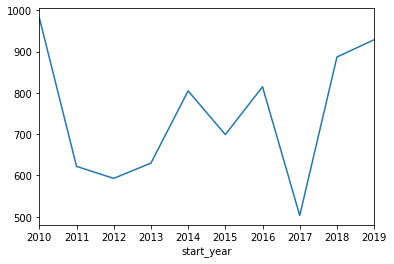

In [66]:
data.groupby('start_year')['puNumber'].count().plot()

Больше всего прокатных удостоверений было выдано в 2010 году, наименьшее количество - в 2017 (всего 503 фильма), после чего отмечался резкий рост количества премьер в 2017 и 2018 годах.

In [67]:
data.query('box_office > 0').groupby('start_year')['puNumber'].count()

start_year
2010    101
2011    109
2012    123
2013    179
2014    272
2015    456
2016    522
2017    355
2018    471
2019    529
Name: puNumber, dtype: int64

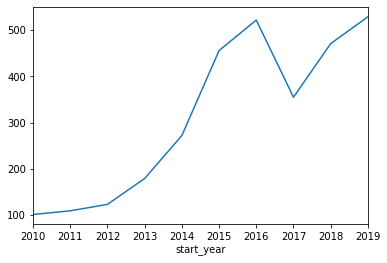

In [129]:
data.query('box_office > 0').groupby('start_year')['puNumber'].count().plot();

Максимальное количество прокатных удостоверений для фильмов, имеющих сборы, было выдано в 2019 (529 лент) и 2016 году (522 фильма). Наименьшее количество - во 2010-2011 годах и постепенно число фильмов в прокате росло до 2016 года. Скорее всего этот рост связан с ростом числа кинозалов - период с 2012 по 2015 годы ознаменовались большим количеством открывающихся многозальных кинотеатров.

In [69]:
data.query('box_office > 0').count()

title                    3117
puNumber                 3117
show_start_date          3117
type                     3117
film_studio              3116
production_country       3117
director                 3117
producer                 3005
age_restriction          3117
refundable_support        301
nonrefundable_support     301
budget                    301
financing_source          301
ratings                  2864
genres                   3117
box_office               3117
support                   301
start_year               3117
main_director            3117
main_genres              3117
share_support             301
dtype: int64

Данные осборах есть только по 3117 картинам, причем только 301 из них получила госфинансиование.

In [70]:
(data.query('box_office > 0').count() / data['puNumber'].count())*100

title                   41.754856
puNumber                41.754856
show_start_date         41.754856
type                    41.754856
film_studio             41.741460
production_country      41.754856
director                41.754856
producer                40.254521
age_restriction         41.754856
refundable_support       4.032150
nonrefundable_support    4.032150
budget                   4.032150
financing_source         4.032150
ratings                 38.365707
genres                  41.754856
box_office              41.754856
support                  4.032150
start_year              41.754856
main_director           41.754856
main_genres             41.754856
share_support            4.032150
dtype: float64

Данные о прокатных сборах есть только у 41,75% фильмов по всей выборке и только 4% имеют данные о госфинансировании и сборах в кино. Не стоит забывать, что данные колонки box_office взяты из второго датафрейма, который изначально состоял из 3158 строк, поэтому мы не можем утверждать, что отсутствие данных о сборах - показатель того, что проката не было, возможно некоторые картины из первой выборки не были представлены во второй.

**Динамика суммы сборов по годам**

In [71]:
data.groupby('start_year')['box_office'].agg(['sum'])

,sum
start_year,
2010,2428654.000000
2011,14102765.000000
2012,6955423.000000
2013,29799706.200000
2014,7434717843.100000
2015,38527827199.089996
2016,46742316269.480042
2017,48458147253.750000
2018,49251991405.199989


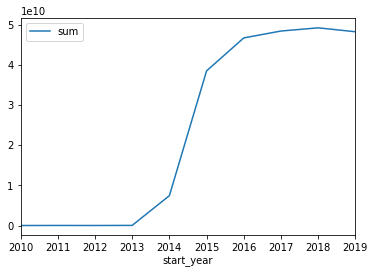

In [130]:
data.groupby('start_year')['box_office'].agg(['sum']).plot();

Интересен график сборов кинотеатров: резкий скачок 2014 года. Возможных причин тому несколько: прежде всего рост производства фильмов в мире. Только производители Европы отмечали в период с 2013 по 2015 год рост количества выпускаемых лент на 47%.

Еще одной возможной причиной взрывного роста сборов мог стать резкий скачок курса доллара в конце 2014 года, в результате в течение следующего года цена на билет в кино выросла почти вдвое и достигла максимума, который был "побит" только "ковидным" 2020 годом.

In [73]:
data.sort_values(by=['box_office'], ascending=False).head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support,start_year,main_director,main_genres,share_support
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.000000,...,160000000.000000,Фонд кино,6.800000,комедия,3073568690.790000,60000000.000000,2019,К.Шипенко,комедия,37.500000
5652,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.000000,...,590192191.000000,Фонд кино,7.500000,"спорт, драма",2779686144.000000,400000000.000000,2017,А.Мегердичев,спорт,67.770000
6819,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,nan,...,nan,NaN,7.600000,"фантастика, боевик, драма",2576613776.830000,nan,2019,Джо Руссо,фантастика,nan
6548,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.000000,...,563784717.000000,Фонд кино,6.500000,"драма, военный, боевик",2271754004.520000,180000000.000000,2018,А.Сидоров,драма,31.930000
3487,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,nan,...,nan,NaN,6.600000,"фэнтези, боевик, комедия",2118396119.000000,nan,2017,Йоаким Реннинг,фэнтези,nan


Интересный момент - рост сборов в 2017 году, когда несмотря на падение количества прокатных фильмов с 523 в 2016 году до 355 сумма сбора выросла на 1,7 млрд рублей. Скорее всего, этот рост сборов - заслуга двух фильмов, входящих в топ-5 по сборам всей выборки - "Холоп" и "Пираты Карибского моря: Мертвецы не рассказывают сказки", которые вышли в 2017 и собрали в сумме 4,9 млрд рублей.

Максимальные сборы в российском прокате в исследуемый период были в 2018 году, минимальные - в 2010.

**Средняя и медианная сумма сборов по годам**

In [74]:
data.query('box_office > 0').pivot_table(index='start_year', values = 'box_office', aggfunc = ['sum', 'median'])

,sum,median
,box_office,box_office
start_year,,
2010,2428654.000000,1710.000000
2011,14102765.000000,3000.000000
2012,6955423.000000,6220.000000
2013,29799706.200000,3580.000000
2014,7434717843.100000,20310.000000
2015,38527827199.089996,4864744.050000
2016,46742316269.480042,3777202.680000
2017,48458147253.750000,9919415.000000


Максимальная сумма прокатных сборов наблюдалась в 2018 году и составила свыше 49 млрд рублей. А вот медиана сборов самая высокая в 2017 году. Самые низкие показатели в 2010 году, что справедливо, учитывая цены на билеты в исследуемых годах.

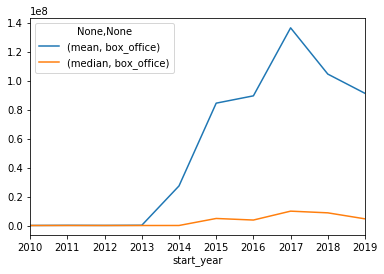

In [132]:
data.query('box_office > 0').pivot_table(index='start_year', values = 'box_office', 
                                         aggfunc = ['mean', 'median']).plot();

In [76]:
data.query('box_office > 0').pivot_table(index='start_year', values = 'box_office', aggfunc = ['median', 'mean',])

,median,mean
,box_office,box_office
start_year,,
2010,1710.000000,24046.079208
2011,3000.000000,129383.165138
2012,6220.000000,56548.154472
2013,3580.000000,166478.805587
2014,20310.000000,27333521.481985
2015,4864744.050000,84490849.120811
2016,3777202.680000,89544667.182912
2017,9919415.000000,136501823.250000


Начиная с 2013 года модно наблюдать значительное расхождение медианных и средних значений (порой в десятки раз). 2013 год показал значительный рост и в количестве выданных прокатных удостоверений, и в суммах сборов, и в начале роста бюджетов. 

2017-2018 годы ознаменовались рекордными сборами причиной которых стал выход целого ряда фильмов из разряда "блокбастеров", которые собрали в прокате суммы в разы превышающие box_office остальных картин, именно такие аномально высокие сборы - причина разницы между медианой и средним. Однако наличие таких супер-успешных картин и их количество - показатель успешного проката, маркетинга и состояния индустрии именно в эти годы.

**Возрастные ограничения и сборы**

Определим, влияет ли возрастной ценз на сборы фильмов (для исследования возьмем период с 2015 по 2019 год).

In [77]:
data['start_year']=data['start_year'].astype('float')
data.query('start_year >= 2015').pivot_table(index='start_year', 
                                             columns = 'age_restriction', 
                                             values = 'box_office', 
                                             aggfunc = 'sum').sum()

age_restriction
«0+» - для любой зрительской аудитории     809077425.970000
«12+» - для детей старше 12 лет          59369189769.499992
«16+» - для детей старше 16 лет          75102265973.600006
«18+» - запрещено для детей              40757657833.610001
«6+» - для детей старше 6 лет            55220193077.919998
dtype: float64

В период с 2015 по 2019 годы самые большие сборы наблюдались у категории фильмов для зрителей старше 16, меньше всего денег в прокате заработали картины с меткой 0+. Картин для детей с 0 лет выпускается мало, большинство анимационных фильмов выходят с пометкой 6+, так как полный метр сложен для просмотря для детей более младшего возраста.

К категории 16+ относится наиболее широкий круг жарнов, здесь выходит больше фильмов, интересных именно молодежи, которая и является основным посетителем кинотеатров.

In [78]:
data.query('start_year >= 2015').pivot_table(index='start_year', 
                                             columns = 'age_restriction', 
                                             values = 'box_office', 
                                             aggfunc = 'sum')

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
start_year,,,,,
2015.000000,379054578.370000,13419509570.509996,10781600601.269999,5430350628.930002,8517311820.010000
2016.000000,150228848.670000,11150762103.959997,16594249489.740004,6793929818.869999,12053146008.240002
2017.000000,229598930.000000,7851427660.670000,18694590951.060001,9651495581.020000,12031034131.000000
2018.000000,32449002.110000,14267291660.690001,16278405946.930000,8760085501.150000,9913759294.320000
2019.000000,17746066.820000,12680198773.670000,12753418984.600002,10121796303.640003,12704941824.349997


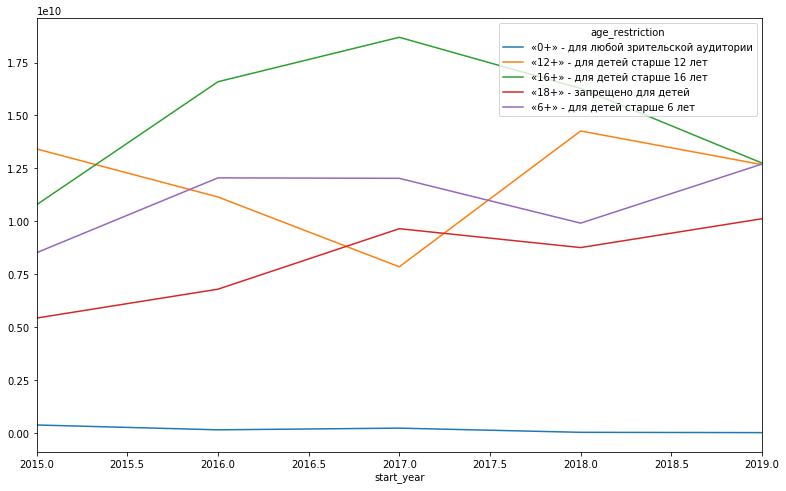

In [139]:
data.query('start_year >= 2015').pivot_table(index='start_year', 
                                             columns = 'age_restriction', 
                                             values = 'box_office', aggfunc = 'sum').plot(figsize=(13, 8));

Динамика изменения суммы сборов по годам очень необычна. 2015 год показал самые большие сборы в категории 12+, затем начали резко расти сборы фильмов 16+, а объемы сборов 12+ стремительно падали вплоть до 2017 года, а позже начался обратный процесс. Параллельно со снижением сборов 12+ росли сборы детского кино (+6). Скорее всего, часть детского сегмента перешла в более раннюю категорию.

С 2017 года начали резко снижаться сборы фильмов категории 16+, но ближе к 2018 году ленты 18+ пошли вверх.

**Выводы**

В ходе исследования периода с 2015 по 2019 годы нами были обнаружены интересные явления: в частности, в 2017 году было выдано самое маленькое количество прокатных удостоверений (всего 503), однако этот год стал одним из самых успешных для российского проката по сумме сборов, которые превысили 48,4 млрд рублей, кроме того, медиана сборов оказалась самой высокой из всех годов исследования – более 9,9 млн рублей.

Еще одно интересное наблюдение – резкий рост сборов российского проката в 2015 году: если сборы 2014 года составляли всего порядка 7,4 млрд рублей, то в 2015 году отрасль показала сумму проката более 38,5 млрд. Это может быть связано с ростом цены (скачек цены на доллар тогда повлек рост цен на билеты в кино почти вдвое), а также с ростом объемов производства кинофильмов за рубежом.

### 4. Исследование фильмов с государственной поддержкой

#### 4.1 Все фильмы с государственной поддержкой

In [80]:
data_support = data.query('support > 0') # создадим детефрейм, который будет включать в себя только фильмы с госсубсидиями
data_support.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,support,start_year,share_support
count,315.000000,315.000000,315.000000,315.000000,298.000000,301.000000,315.000000,315.000000,315.000000
mean,111568271.314286,11603174.603175,48107043.958730,134096082.346032,6.015436,130698257.706146,59710218.561905,2016.742857,51.738762
std,5844829.209818,25151438.815971,59886140.863753,191226039.634245,1.133406,339190287.299343,73085213.484743,1.647398,17.004822
min,111000115.000000,0.000000,0.000000,14462464.000000,1.000000,1550.000000,3000000.000000,2013.000000,4.400000
25%,111004815.500000,0.000000,25000000.000000,46153866.500000,5.400000,1067649.000000,25250000.000000,2015.000000,37.345000
50%,111010219.000000,0.000000,30000000.000000,73379554.000000,6.200000,12748398.300000,35000000.000000,2017.000000,59.230000
75%,111017167.500000,10000000.000000,40000000.000000,150004286.500000,6.700000,103134751.120000,60000000.000000,2018.000000,65.690000
max,214010116.000000,180000000.000000,400000000.000000,2305074303.000000,8.500000,3073568690.790000,500000000.000000,2019.000000,78.470000


**Сборы, бюджет и господдержка**

Добавим колонку с категорией возвратности субсидий исходя из сборов, а также колонку с категорией возвратности бюджета.

In [81]:
#Функция вернет окупаемость субсидий значениями:
#"нет" для фильмов, сумма господдержки которых оказалась больше общего сбора в прокате
#"да" для лент, сборы которых больше суммы господдержки

def payback_support(row):  
        if row['support'] > row['box_office']:
            return 'нет'
        return 'да'
               
data_support['payback_support'] = data_support.apply(payback_support, axis = 1)

C:\Users\Natali\.conda\envs\praktikum_env_win_new1\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [82]:
def payback_budget(row):  
        if row['budget'] < row['box_office']:
            return 'да'
        return 'нет'
               
data_support['payback_budget'] = data_support.apply(payback_budget, axis = 1)

C:\Users\Natali\.conda\envs\praktikum_env_win_new1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


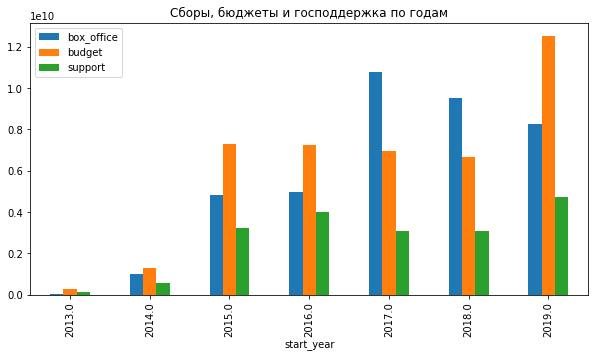

In [159]:
data_support.pivot_table(index='start_year', 
                         values=['support', 'box_office', 'budget'], 
                         aggfunc='sum').plot(kind='bar', title = 'Сборы, бюджеты и господдержка по годам', figsize=(10, 5));

За все исследуемые годы суммарные сборы фильмов с господдержкой превышали бюджет только в 2017 и 2018 годах. В эти годы мы наблюдали выход в российский прокат картин из топ-10 по сборам всего датафрейма. Однако во все годы, кроме 2013 можно наблюдать, что суммарно картинам удавалось собрать денег больше, чем было выделено финансированием.

(Важно отметить, что данных за 2013 год мало, масштабное финансирование кинопроектов началось в 2014 году, Фонд кино подключился к этой работе в конце 2014-2015 годах)

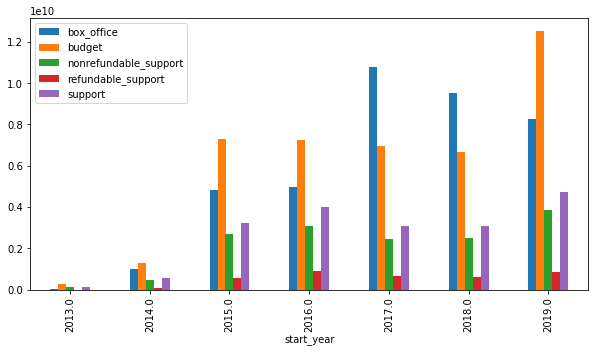

In [141]:
data_support.pivot_table(index='start_year', 
                         values=['support', 'box_office', 'budget', 'refundable_support', 'nonrefundable_support'], 
                         aggfunc='sum').plot(kind='bar', figsize=(10, 5));

Сумма возвратного финансирования в каждый год оставалась примерно на одном уровне, а вот сумма невозвратных субсидий немного снижалась в 2017 и 2018 году и достигла пика в 2019. Невозвратное финансирование каждый год значительно превосходило по объему субсидии к возврату.

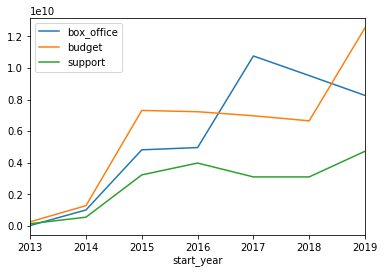

In [142]:
data_support.pivot_table(index='start_year', values=['support', 'box_office', 'budget'], aggfunc='sum').plot();

При рассмотрении динамики сборов, бюджетов и господдержки по годам виден стабильный рост всех показателей в 2014-2015 году, затем сумма бюджетов немного снижалась, поддержка медленно росла, к 2017 году картина изменилась, сборы резко выросли даже при снижении суммы господдержки. Резко изменилась картина в 2019 году, когда бюджеты резко пошли вверх, поддержка продолжала рост, а вот сборы значительно снизились.

**Господдержка по годам**

In [86]:
data_support['support'].sum()

18808718847.0

За все исследуемые годы сумма субсидий киноиндустрии составила чуть более 18,8 млрд рублей.

In [87]:
data_support.pivot_table(index='start_year', values='support', aggfunc='sum').sort_values(by='support')

,support
start_year,
2013.000000,134347945.000000
2014.000000,549002299.000000
2018.000000,3098000000.000000
2017.000000,3098971662.000000
2015.000000,3227241459.000000
2016.000000,3977155482.000000
2019.000000,4724000000.000000


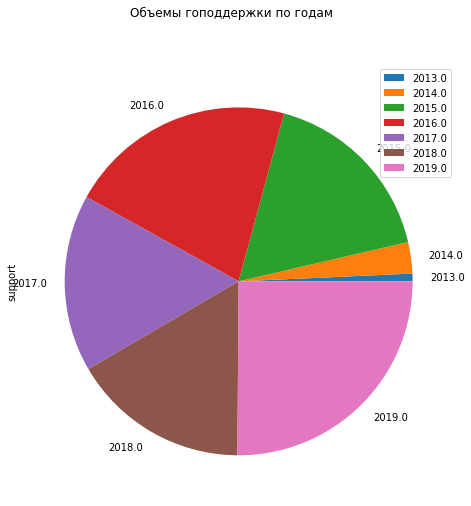

In [157]:
data_support.pivot_table(index='start_year', values='support', 
                         aggfunc='sum').plot(kind='pie', subplots=True, title = 'Объемы гоподдержки по годам', figsize=(8, 8));

Самую большую подержку российские фильмы получили в 2019 году, когда сумма субсидий превысила 4,7 млрд рублей.

**Источники субсидирования**

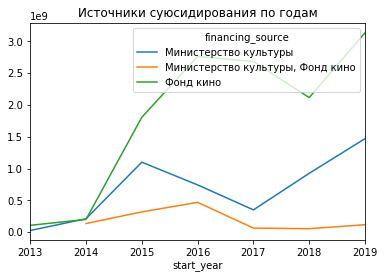

In [156]:
data_support.pivot_table(index='start_year',  columns = 'financing_source', values='support', 
                         aggfunc='sum').plot(title = 'Источники суюсидирования по годам');

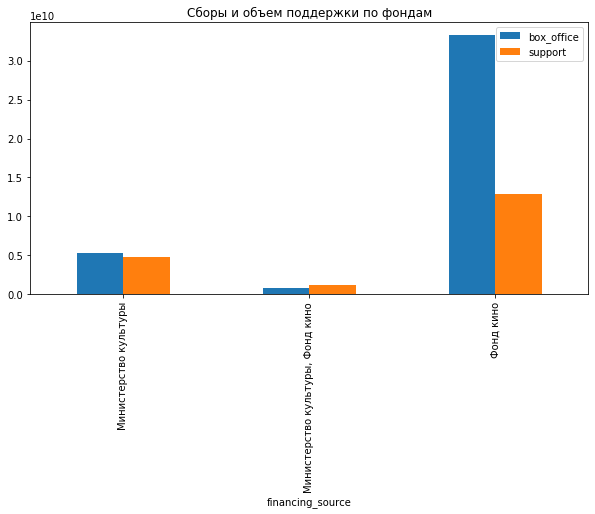

In [155]:
data_support.pivot_table(index='financing_source', 
                         values=['support', 'box_office'], 
                         aggfunc='sum').plot(kind='bar', figsize=(10, 5), title = 'Сборы и объем поддержки по фондам');

Самые большие объемы субсидирования оказывает Фонд кино, именно он оказывает поддержку крупнейшим киностудиям и выделяет средства на съемки "блокабастеров". Согласно положениям Минкульта, министерство выделяет средства на съемки документального и исторического кино, поддержку молодых режиссеров, сборы таких фильмов ожидаемо не велики, но и сумма субсидирования значительно ниже. Стабильно не окупаются и проекты совместной поддержки.

**Жанры и типы фильмов с господдержкой**

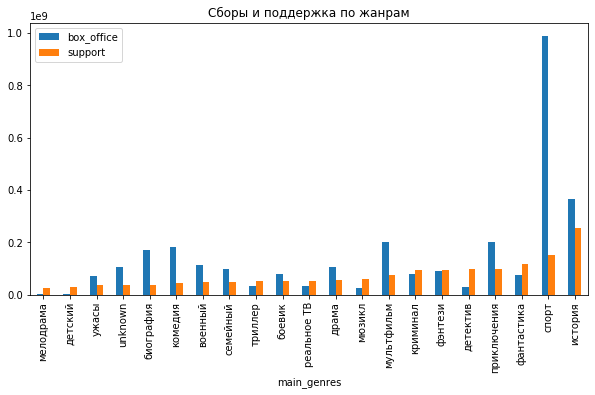

In [153]:
data_support.pivot_table(index='main_genres', 
                         values=['box_office', 'support'], 
                         aggfunc='mean').sort_values(by='support').plot(kind='bar', figsize=(10, 5),
                                                                       title = 'Сборы и поддержка по жанрам');

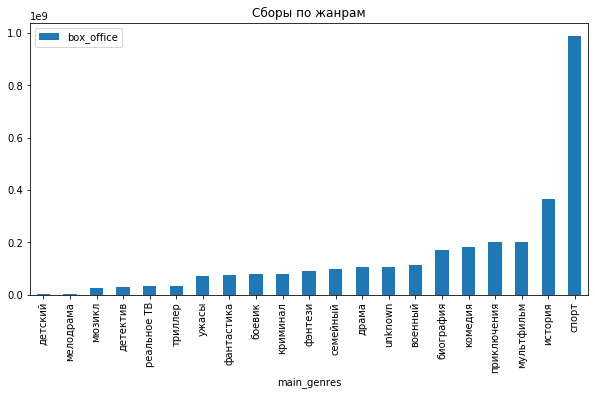

In [154]:
data_support.pivot_table(index='main_genres', 
                         values=['box_office'], 
                         aggfunc='mean').sort_values(by='box_office').plot(kind='bar', figsize=(10, 5),
                                                                          title = 'Сборы по жанрам');

Наибольшую среднюю сумму господдержки за исследуемые годы получили исторические и спортивные фильмы, а также российская фантастика. При этом лучшие сборы в получили спортивные ленты, также окупились исторические картины, а вот фантастика в среднем не смогла собрать больше суммы госфинансирования. При том, что в отбщем прокате отрасли фантастика приносит одни из самых крупных сборов и занимает по сумме второе место после фильмов спортивной тематики.

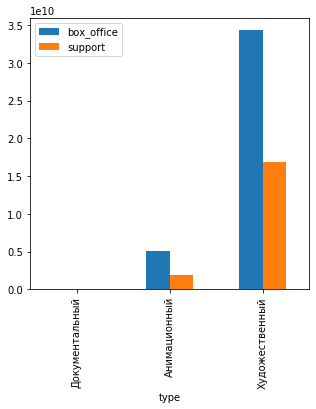

In [147]:
data_support.pivot_table(index='type', 
                         values=['box_office', 'support'], 
                         aggfunc='sum').sort_values(by='support').plot(kind='bar', figsize=(5, 5));

Что касается типов фильмов, которым оказывалась господдержка, большие всего денег было выделено художественным фильмам, далее идет анимация. Оба эти типа в прокате собрали суммарно больше, чем на них было выделено бюджетных средств.

**Возрастное ограничение и рейтинг**

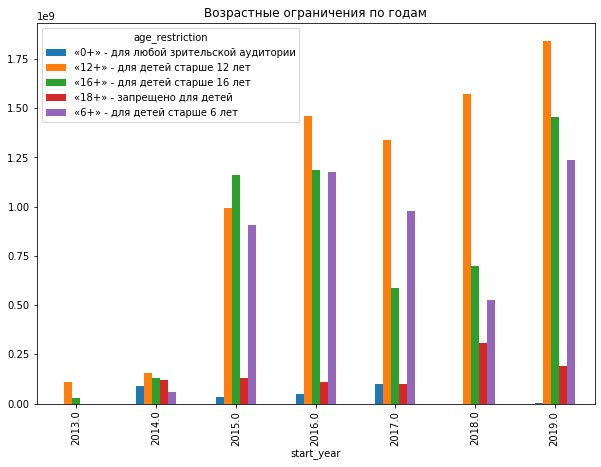

In [152]:
data_support.pivot_table(index='start_year', 
                         columns = 'age_restriction',
                         values = 'support', aggfunc = 'sum').plot(kind='bar', figsize=(10, 7), 
                                                                   title = 'Возрастные ограничения по годам');

С 2016 года большую сумму господдержки выделяли на фильмы категории 12+, стабильно большие объемы поддержки получали картины с возрастным цензом 6+ и 12+.

In [96]:
data_support['ratings'].describe()

count   298.000000
mean      6.015436
std       1.133406
min       1.000000
25%       5.400000
50%       6.200000
75%       6.700000
max       8.500000
Name: ratings, dtype: float64

Средний рейтинг фильмов с господдержкой - 6 при среднем показателе по всей выборке - 6,48.

**Режиссеры**

In [97]:
data_support['main_director'].value_counts()

Р.Давлетьяров    5
Д.Дьяченко       4
С.Андреасян      4
Д.Шмидт          3
К.Шипенко        3
                ..
П.Санаев         1
Д.Светозаров     1
А.Герман         1
И.Вырыпаев       1
В.Щегольков      1
Name: main_director, Length: 258, dtype: int64

In [98]:
data_support.query('main_director =="Р.Давлетьяров"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,support,start_year,main_director,main_genres,share_support,payback_support,payback_budget
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000000,...,5.300000,"комедия, фантастика",19957031.500000,107847945.000000,2013.000000,Р.Давлетьяров,комедия,61.270000,нет,нет
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.000000,...,8.500000,"драма, военный, история",249166767.700000,150000000.000000,2015.000000,Р.Давлетьяров,драма,68.000000,да,да
2481,Однажды._,111004215,2015-04-15 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА"", НП ""Интерфест""",Россия,Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский",«16+» - для детей старше 16 лет,0.000000,...,7.900000,"драма, криминал, детектив",12748398.300000,97000000.000000,2015.000000,Р.Давлетьяров,драма,62.040000,нет,нет
2722,Чистое искусство.,111008715,2015-05-05 12:00:00+00:00,Художественный,"ООО ""КОМПАНИЯ ""РЕАЛ-ДАКОТА""",Россия,Р.Давлетьяров,Р.Давлетьяров,«16+» - для детей старше 16 лет,15000000.000000,...,5.900000,"триллер, детектив",6457303.020000,75000000.000000,2015.000000,Р.Давлетьяров,триллер,67.120000,нет,нет
6921,Донбасс. Окраина,111007919,2019-06-12 12:00:00+00:00,Художественный,"АНО ""Интерфест"", ООО ""Пропеллер Продакшн""",Россия,Р.Давлетьяров,"Р.Давлетьяров, Г.Поземельный",«12+» - для детей старше 12 лет,0.000000,...,6.300000,"драма, военный, триллер",10933431.920000,30000000.000000,2019.000000,Р.Давлетьяров,драма,28.380000,нет,нет


Интересно, но 4 из 5 фильмов режиссера Давлетьярова, для которых была выделена субсидия, не вернули в прокате ее сумму, несмотря на довольно высокие рейтинги.

#### 4.2 Фильмы, не окупившиеся в прокате

In [99]:
data_support.query('payback_budget == "нет"').describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,support,start_year,share_support
count,249.000000,249.000000,249.000000,249.000000,233.000000,235.000000,249.000000,249.000000,249.000000
mean,111620258.032129,9020080.321285,43827535.722892,122685929.518072,5.976824,32489393.911106,52847616.044177,2016.694779,52.389598
std,6556395.355147,23477708.488006,52650987.739858,199957907.097218,1.147326,78236192.004429,67298792.767138,1.681017,17.330591
min,111000115.000000,0.000000,0.000000,14462464.000000,1.000000,1550.000000,3000000.000000,2013.000000,4.400000
25%,111005816.000000,0.000000,25000000.000000,42000000.000000,5.400000,627263.500000,25000000.000000,2015.000000,37.380000
50%,111010515.000000,0.000000,30000000.000000,61571449.000000,6.200000,4293649.510000,30000000.000000,2016.000000,61.580000
75%,111016615.000000,5000000.000000,40000000.000000,120000000.000000,6.700000,25977291.300000,50000000.000000,2018.000000,65.790000
max,214010116.000000,180000000.000000,400000000.000000,2305074303.000000,8.500000,717703185.530000,500000000.000000,2019.000000,78.470000


**Сборы, бюджет и господдержка**

In [100]:
data_support.query('payback_budget == "нет"').pivot_table(index='start_year', 
                                                           values=['support', 'box_office'], 
                                                           aggfunc='sum')

,box_office,support
start_year,,
2013.000000,20322385.100000,134347945.000000
2014.000000,179128043.900000,393002299.000000
2015.000000,786384561.220000,2399152404.000000
2016.000000,1890761186.230000,3144706000.000000
2017.000000,1385596771.200000,1343847747.000000
2018.000000,851383065.200000,1695000000.000000
2019.000000,2521431556.260000,4049000000.000000


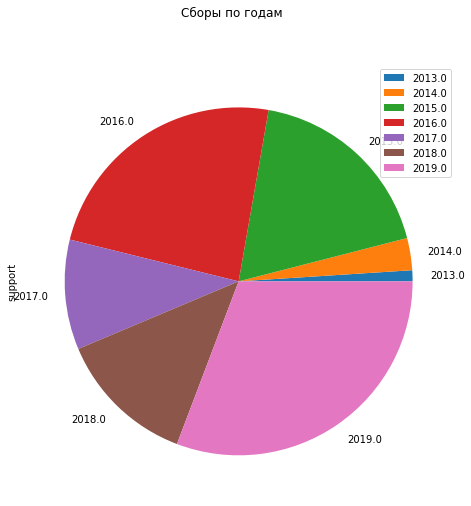

In [150]:
data_support.query('payback_budget == "нет"').pivot_table(index='start_year', 
                                                           values='support', 
                                                           aggfunc='sum').plot(kind='pie', subplots=True, 
                                                                               title = 'Сборы по годам', figsize=(8, 8));

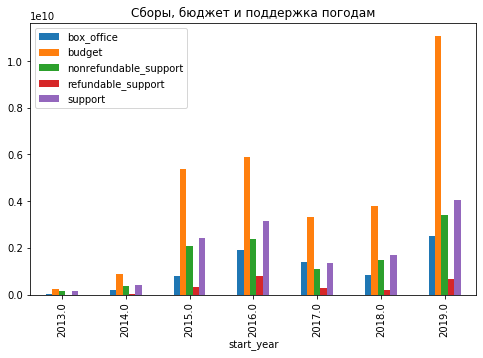

In [151]:
data_support.query('payback_budget == "нет"').pivot_table(index='start_year', 
                                                       values=['support', 'box_office', 'refundable_support','nonrefundable_support', 'budget'], 
                                                       aggfunc='sum').plot(kind='bar', figsize=(8, 5), title = 'Сборы, бюджет и поддержка погодам');

Среди фильмов, сборы которых не смогли превысить бюджет, самые большие объемы госфинансирования наблюдались в 2015, 2016 и 2019 годах. При этом во все годы бюджет значительно превосходил суммы господдержки. сумма сборов не смогла превысить сумму средств субсидирования, выделенных на возвратных условиях. Только в 2017 году кассовый сбор немного превысил общую сумму субсидирования лент данной выборки.

**Источники субсидирования**

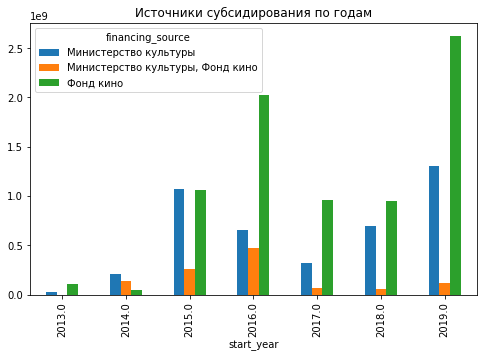

In [160]:
data_support.query('payback_budget == "нет"').pivot_table(index='start_year',  
                                                           columns = 'financing_source', values='support', 
                                                           aggfunc='sum').plot(kind='bar', title = 'Источники субсидирования по годам', figsize=(8, 5));

Большинство лент, провалившихся в прокате было субсидировано Фондом кино, что связано с бОльшими объемами выделяемых средств Фондом, нежели Минкультом.

**Жанры и типы не окупившихся фильмов с господдержкой**

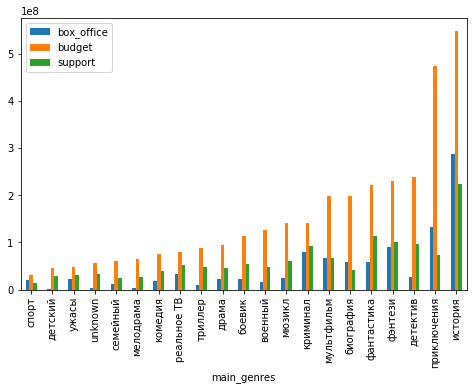

In [161]:
data_support.query('payback_budget == "нет"').pivot_table(index='main_genres', 
                                                       values=['box_office', 'budget', 'support'], 
                                                       aggfunc='mean').sort_values(by='budget').plot(kind='bar', 
                                                                                                      figsize=(8, 5));

Наибольший средний бюджет среди фильмов, не собравших кассы, отмечается у исторических, приключенческих и детективных картин. Важно заметить, что приключения и история собрали в прокате в среднем суммы выше среднего объема субсидий.

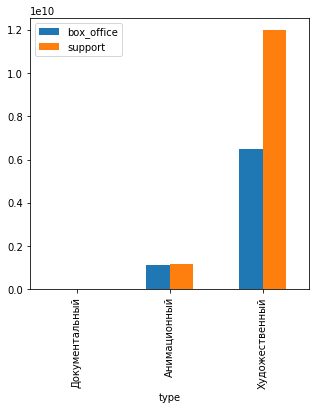

In [162]:
data_support.query('payback_budget == "нет"').pivot_table(index='type',
                                                          values=['box_office', 'support'], 
                                                          aggfunc='sum').sort_values(by='support').plot(kind='bar', figsize=(5, 5));

Среди типов не окупившихся фильмов наибольшую сумму господдержки получили художественные фильмы.

**Возрастное ограничение и рейтинг**

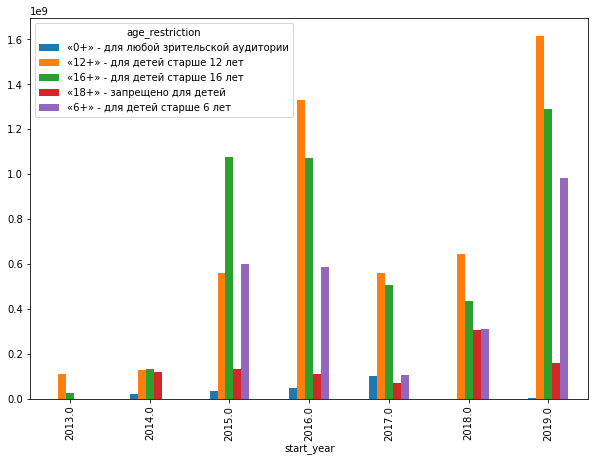

In [106]:
data_support.query('payback_budget == "нет"').pivot_table(index='start_year', 
                                             columns = 'age_restriction', 
                                             values = 'support', aggfunc = 'sum').plot(kind='bar', figsize=(10, 7))

Максимальную сумму господдержки в данной выборке получили ленты с возрастным цензом 12+ и 16+. В эти категории входит максимальное количество жанров и, соответственно, максимальное число картин. Меньше всего средств выделялось картинам для детей с 0 лет, этот сегмент полностью пропадает из выборки в 2018 году.

In [107]:
data_support.query('payback_budget == "нет"')['ratings'].describe()

count   233.000000
mean      5.976824
std       1.147326
min       1.000000
25%       5.400000
50%       6.200000
75%       6.700000
max       8.500000
Name: ratings, dtype: float64

Средний рейтинг картин, не собравших в прокате больше суммы господдержки чуть выше 5,9, что очень близко к среднему рейтингу всех фильмов с господдержкой. Это может говорить о том, что маленькие сборы - не показатель плохого качества картины, в выборке есть фильмы с рейтингом 8.5. Многие фильмы не попали в широкий прокат.

**Режиссер**

In [108]:
data_support.query('payback_budget == "нет"').sort_values(by=['box_office']).head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,support,start_year,main_director,main_genres,share_support,payback_support,payback_budget
3148,Я-Учитель,111019715,2015-12-02 12:00:00+00:00,Художественный,"НП Киностудия детских и юношеских фильмов ""Иль...",Россия,С.Мокрицкий,А.Ковтунец,«12+» - для детей старше 12 лет,0.000000,...,7.400000,"мелодрама, комедия",1550.000000,35000000.000000,2015.000000,С.Мокрицкий,мелодрама,38.460000,нет,нет
2526,Вдвоем на льдине.,111011015,2015-06-25 12:00:00+00:00,Художественный,"ООО ""Первое творческое объединение""",Россия,"Н.Джорджадзе, В.Игнатьев","П.Поляков, И.Букреев",«12+» - для детей старше 12 лет,0.000000,...,6.600000,мелодрама,4450.000000,26500000.000000,2015.000000,Н.Джорджадзе,мелодрама,69.840000,нет,нет
2802,Битва с экстрасенсами,111011315,2015-07-20 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",Россия,И.Кордзаия,Е.Мелентьев,«12+» - для детей старше 12 лет,0.000000,...,5.400000,"фэнтези, приключения",6000.000000,25900000.000000,2015.000000,И.Кордзаия,фэнтези,43.490000,нет,нет
3503,День До,111010916,2016-07-06 12:00:00+00:00,Художественный,"ООО ""Кинобюро"" по заказу ООО ""Среда и Ко""",Россия,"А.Котт, В.Котт, А.Карпиловский, Б.Хлебников","А.Цекало, А.Котт",«18+» - запрещено для детей,25000000.000000,...,4.800000,"драма, фантастика",9000.000000,50000000.000000,2016.000000,А.Котт,драма,55.050000,нет,нет
2149,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30 12:00:00+00:00,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,«18+» - запрещено для детей,0.000000,...,nan,unknown,19820.000000,25000000.000000,2015.000000,К.Сухарьков,unknown,66.900000,нет,нет
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000000,...,nan,unknown,28140.000000,26000000.000000,2014.000000,А.Якимчук,unknown,70.000000,нет,нет
2947,ВСЯ НАША НАДЕЖДА...,111007716,2016-04-22 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Парадиз""",Россия,К.Геворкян,"Г.Нерсисян, А.Манасарян, А.Гюлумян, Д.Кулаков",«12+» - для детей старше 12 лет,0.000000,...,7.200000,"драма, мелодрама",35897.000000,30000000.000000,2016.000000,К.Геворкян,драма,64.940000,нет,нет
2378,Экспириенс,111000315,2015-01-13 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,Е.Татаров,А.Тютрюмов,«16+» - для детей старше 16 лет,0.000000,...,4.700000,драма,36550.000000,26000000.000000,2015.000000,Е.Татаров,драма,70.000000,нет,нет
2168,Трагедия в бухте Роджерс,111003215,2015-03-26 12:00:00+00:00,Художественный,"ООО ""Валдай""",Россия,Ф.Абрютин,"С.Кучмаева, С.Зернов",«12+» - для детей старше 12 лет,0.000000,...,6.100000,"детектив, история, драма",40050.000000,30000000.000000,2015.000000,Ф.Абрютин,детектив,69.770000,нет,нет
3142,Завтра утром,111021715,2015-12-28 12:00:00+00:00,Художественный,"ООО ""Кинофабрика""",Россия,"А.Майовер, Д.Крылова","В.Рубан, А.Тельнов, А.Львович",«12+» - для детей старше 12 лет,0.000000,...,5.700000,"мелодрама, комедия, спорт",51220.000000,35000000.000000,2015.000000,А.Майовер,мелодрама,70.000000,нет,нет


Изучение фильмов с самыми низкими сборами показало, что большинство из них так и не вышло в прокат, все они были сняты при поддержке Минкульта и были показаны только в рамках кино-фестивалей/

In [109]:
data_support.query('payback_budget == "нет"')['main_director'].value_counts()

Р.Давлетьяров            4
А.Котт                   3
С.Андреасян              3
А.Якимчук                2
Ф.Дмитриев               2
                        ..
Г.Куценко (Ю.Куценко)    1
А.Майовер                1
П.Левченко               1
Е.Татаров                1
Эген Уулу Нурбек         1
Name: main_director, Length: 220, dtype: int64

In [110]:
data_support.query('payback_budget == "нет" and main_director == "Р.Давлетьяров"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,support,start_year,main_director,main_genres,share_support,payback_support,payback_budget
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000000,...,5.300000,"комедия, фантастика",19957031.500000,107847945.000000,2013.000000,Р.Давлетьяров,комедия,61.270000,нет,нет
2481,Однажды._,111004215,2015-04-15 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА"", НП ""Интерфест""",Россия,Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский",«16+» - для детей старше 16 лет,0.000000,...,7.900000,"драма, криминал, детектив",12748398.300000,97000000.000000,2015.000000,Р.Давлетьяров,драма,62.040000,нет,нет
2722,Чистое искусство.,111008715,2015-05-05 12:00:00+00:00,Художественный,"ООО ""КОМПАНИЯ ""РЕАЛ-ДАКОТА""",Россия,Р.Давлетьяров,Р.Давлетьяров,«16+» - для детей старше 16 лет,15000000.000000,...,5.900000,"триллер, детектив",6457303.020000,75000000.000000,2015.000000,Р.Давлетьяров,триллер,67.120000,нет,нет
6921,Донбасс. Окраина,111007919,2019-06-12 12:00:00+00:00,Художественный,"АНО ""Интерфест"", ООО ""Пропеллер Продакшн""",Россия,Р.Давлетьяров,"Р.Давлетьяров, Г.Поземельный",«12+» - для детей старше 12 лет,0.000000,...,6.300000,"драма, военный, триллер",10933431.920000,30000000.000000,2019.000000,Р.Давлетьяров,драма,28.380000,нет,нет


Самым встречаемым режиссером среди фильмов с господдержкой, не сумевших собрать кассу, как и самым частым режиссером во всей выборке, является Ренат Давлетьяров. Его фильм "Однажды" имеет рейтинг 7.9, однако дотянуть сборы до бюджета он так и не смог. Это еще один пример того, как по-разному отражают интерес к фильмам рейтинги и сборы.

In [111]:
data_support.query('payback_support == "нет"').describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,support,start_year,share_support
count,196.000000,196.000000,196.000000,196.000000,181.000000,196.000000,196.000000,196.000000,196.000000
mean,111131997.622449,6178571.428571,39140491.811224,89240999.459184,5.964088,12600616.431786,45319063.239796,2016.525510,55.843010
std,593740.374950,17313125.859739,39905229.117246,95693911.920610,1.128314,32134866.449992,48152345.993627,1.662362,14.936491
min,111000115.000000,0.000000,0.000000,14462464.000000,1.000000,1550.000000,4700000.000000,2013.000000,7.690000
25%,111004992.250000,0.000000,25000000.000000,40011341.500000,5.400000,398755.500000,25000000.000000,2015.000000,47.315000
50%,111009567.500000,0.000000,30000000.000000,55567193.500000,6.200000,2081937.000000,30000000.000000,2016.000000,63.370000
75%,111014519.000000,0.000000,35000000.000000,95016386.500000,6.700000,11754248.750000,40875000.000000,2018.000000,66.275000
max,114006218.000000,150000000.000000,300000000.000000,779941965.000000,8.100000,364285139.600000,450000000.000000,2019.000000,78.470000


**Из 249 фильмов, которым не удалось собрать в прокате сумму, превышающую бюджет, 196 фильмов не собрали даже сумму господдержки.**

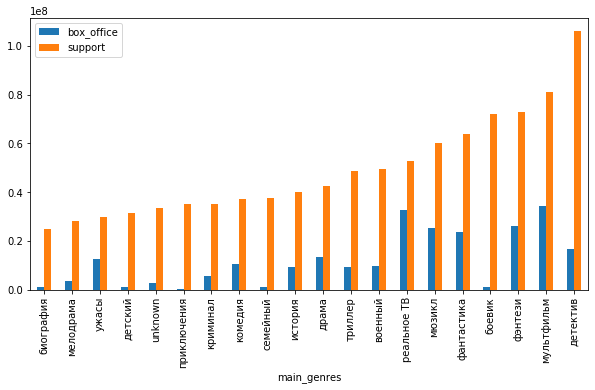

In [163]:
data_support.query('payback_support == "нет"').pivot_table(index='main_genres', 
                                                       values=['box_office', 'support'], 
                                                       aggfunc='mean').sort_values(by='support').plot(kind='bar', figsize=(10, 5));

Сумма господдержки фильмов, не собравших в прокате даже сумму субсидии, выше всего для детективов и мультфильмов в отличие от выборки не собравшей весь бюджет, где лидерами антирейтинга стали исторические и приключенческие фильмы.

In [113]:
data_support.query('support == 450000000.000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,support,start_year,main_director,main_genres,share_support,payback_support,payback_budget
3350,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000000.000000,...,6.600000,драма,364285139.600000,450000000.000000,2016.000000,А.Мизгирев,драма,65.770000,нет,нет


Самую большую господдержку среди фильмов, не сумевших вернуть бюджет сосборов, оказался фильм "Дуэлянт". При общей поддержке в 450 млн рублей картина собрала лишь чуть больше 364 млн.

In [114]:
data_support.query('payback_support == "нет"')['share_support'].mean()

55.84301020408164

Средняя доля средств государственной поддержки в бюджете не окупившихся лент - 55,8%

То, что 249 фильмов (79% всей выборки) из 315 лент, получивших господдержку, не смоги окупиться в прокате и то, что среди картин с минимальными сборами есть фильмы с рейтингами 7.5-8.5 – показатель того, что субсидирование необходимо для того, чтобы на российском экране могли появляться качественные фильмы (в частности авторские и документальные), цель которых – не сорвать кассу, а донести до людей идею. Без помощи государства многие эти ленты были бы невозможны.

#### 4.3 Фильмы с кгосподдержкой, окупившиеся в прокате

In [115]:
data_support.query('payback_budget == "да"').describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,support,start_year,share_support
count,66.000000,66.000000,66.000000,66.000000,65.000000,66.000000,66.000000,66.000000,66.000000
mean,111372139.606061,21348484.848485,64252461.393939,177143477.106061,6.153846,480381333.340000,85600946.242424,2016.924242,49.283333
std,984946.359622,28824931.742793,80082816.092732,147367534.044411,1.079218,591553223.445913,87532208.279416,1.512111,15.594594
min,111000116.000000,0.000000,0.000000,31305313.000000,2.900000,62260863.650000,20000000.000000,2014.000000,12.960000
25%,111003668.000000,0.000000,28132500.000000,80000000.000000,5.300000,126223842.025000,31250000.000000,2016.000000,36.307500
50%,111008368.500000,6500000.000000,35000000.000000,135275751.500000,6.400000,308026063.470000,50061957.500000,2017.000000,50.415000
75%,111018365.750000,40000000.000000,54934291.250000,218339440.000000,6.900000,533516503.750000,100000000.000000,2018.000000,63.802500
max,114008818.000000,115000000.000000,400000000.000000,635283867.000000,8.500000,3073568690.790000,442104482.000000,2019.000000,70.000000


Всего 66 субсидированных картин смогли собрать в прокате больше, чем было потрачено на их производство. Максимальные сборы здесь превысили 3 млрд рублей.

In [116]:
data_support.query('payback_budget == "да" and box_office == 3073568690.790000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,support,start_year,main_director,main_genres,share_support,payback_support,payback_budget
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.000000,...,6.800000,комедия,3073568690.790000,60000000.000000,2019.000000,К.Шипенко,комедия,37.500000,да,да


Абсолютным лидером как в данной выборке, так и во всех исследуемых лентах стал фильм Холоп. При господдержке в 60 млн рублей (25 млн из которых - возвратные средства) и бюджете в 160 млн лента собрала в прокате рекордные 3 млрд рублей, по данным Кинопоиска ее посмотрели 12,2 млн человек. Рейтинг картины 6,8.

In [117]:
data_support.query('payback_budget == "да" and support == 442104482.000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,support,start_year,main_director,main_genres,share_support,payback_support,payback_budget
2919,Экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50000000.000000,...,7.600000,"драма, триллер, приключения",1402255390.000000,442104482.000000,2016.000000,Н.Лебедев,драма,69.590000,да,да


Самую большую сумму господдержки среди окупившихся фильмов получил фильм "Экипаж". Ему было выделено более 442 млн рублей, фильм смог собрать в покате почти на 1 млрд больше. При бюджете в 635 млн сборы составили чуть больше 1,4 млрд рублей. Рейтинг картины 7.6, ее посмотрели 5,4 млн зрителей.

**Бюджет, поддержка и сборы**

In [118]:
data_support.query('payback_budget == "да"').pivot_table(index='start_year', 
                                                           values=['support', 'box_office'],
                                                           aggfunc='sum')

,box_office,support
start_year,,
2014.000000,828060106.600000,156000000.000000
2015.000000,4029362859.610000,828089055.000000
2016.000000,3066963180.440000,832449482.000000
2017.000000,9373918566.000000,1755123915.000000
2018.000000,8666274215.930000,1403000000.000000
2019.000000,5740589071.860000,675000000.000000


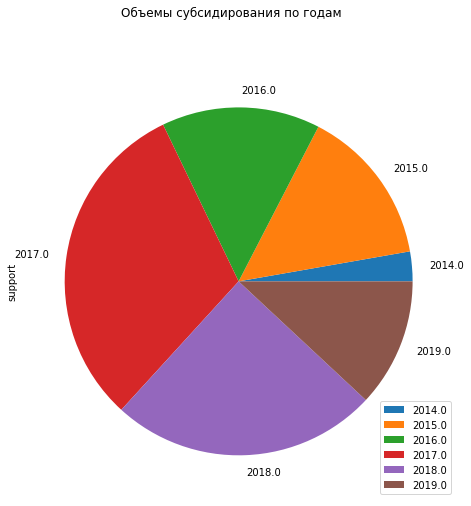

In [164]:
data_support.query('payback_budget == "да"').pivot_table(index='start_year', 
                                                           values='support', 
                                                           aggfunc='sum').plot(kind='pie', subplots=True, title = 'Объемы субсидирования по годам', figsize=(8, 8));

Лидеры по сумме субсидирования фильмов, окупившихся в прокате, отличаются от тех, кому этого не удалось. Наибольшие суммы субсидий сделавшие кассу ленты получили в 2017, 2018 и 2019 годах.

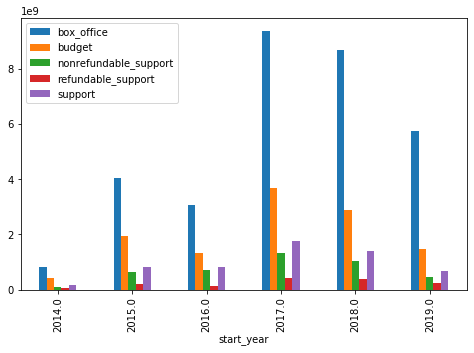

In [165]:
data_support.query('payback_budget == "да"').pivot_table(index='start_year', 
                                                       values=['support', 'box_office', 'refundable_support', 
                                                               'nonrefundable_support', 'budget'], 
                                                       aggfunc='sum').plot(kind='bar', figsize=(8, 5));

Максимальную сумму субсидирования картины данной категории получили в 2017 году - более 1,7 млрд рублей, при этом сборы этого года тоже максимальны, фильмы с господдержкой собрали в 2017 году более 9,3 млрд.

**Источники субсидирования**

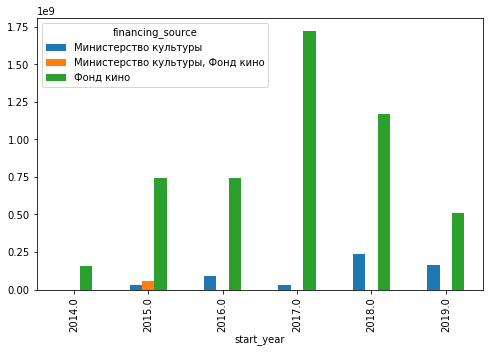

In [166]:
data_support.query('payback_budget == "да"').pivot_table(index='start_year',  
                                                           columns = 'financing_source', values='support', 
                                                           aggfunc='sum').plot(kind='bar', figsize=(8, 5));

Абсолютное большинство вернувших сумму субсидий в прокате фильмов получили поддержку Фонда кино, что отвечает целям фонда - поддерживать производство российского массового кино.

**Жанры и типы**

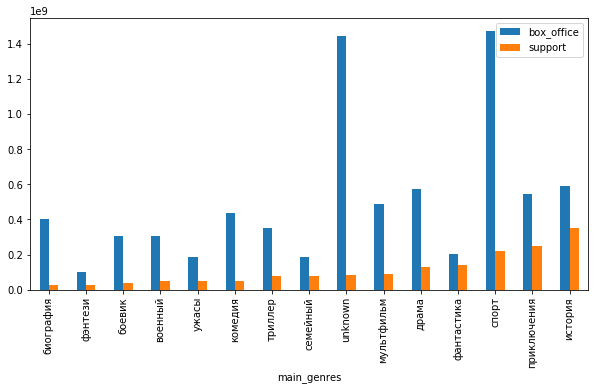

In [167]:
data_support.query('payback_budget == "да"').pivot_table(index='main_genres', 
                                                       values=['box_office', 'support'], 
                                                       aggfunc='mean').sort_values(by='support').plot(kind='bar', figsize=(10, 5));

Наибольшие показатели среднего объема субсидирования в этой группе показали исторические и приключенческие ленты. К сожалению, большой объем сборов у фильмов, жанр которых не определен.

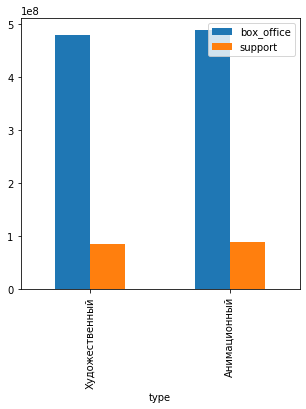

In [168]:
data_support.query('payback_budget == "да"').pivot_table(index='type', 
                                                       values=['box_office', 'support'], 
                                                       aggfunc='mean').sort_values(by='support').plot(kind='bar', figsize=(5, 5));

In [ ]:
data_support.query('payback_budget == "да"').pivot_table(index='type', 
                                                       values=['box_office', 'support'], 
                                                       aggfunc='mean').sort_values(by='support')

Средние значения субсидирования художественных и анимационных фильмовпримерно одинаковы в этом сегменте.

**Возрастное ограничение и рейтинг**

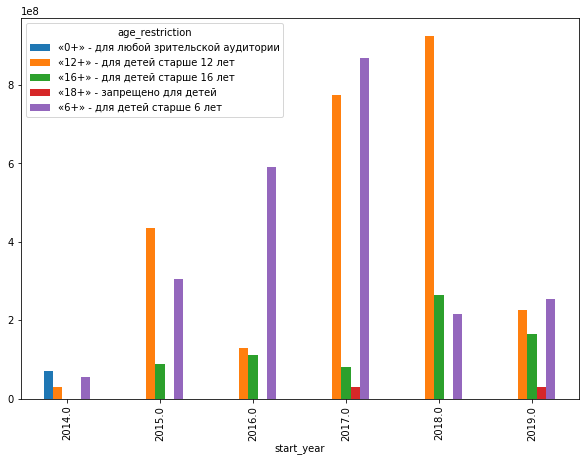

In [169]:
data_support.query('payback_budget == "да"').pivot_table(index='start_year', 
                                             columns = 'age_restriction', 
                                             values = 'support', aggfunc = 'sum').plot(kind='bar', figsize=(10, 7));

Стабильно большая сумма субсидирования среди фильмов, окупившихся в прокате, у лент категории 6+, при чем ленты этой категории были лидерами по объемам господдержки в 2016, 2017 и 2019 году. В 2015 и 2018 годах лидером по суммам субсидирования в этой выборке становились картины для зрителей 12+. Этот возрастной ценз позволяет включать большинство жанров и привлекать самые активные зрительские возрастные категории, которые и "сделали кассу" этим фильмам.

In [125]:
data_support.query('payback_budget == "да"')['ratings'].describe()

count   65.000000
mean     6.153846
std      1.079218
min      2.900000
25%      5.300000
50%      6.400000
75%      6.900000
max      8.500000
Name: ratings, dtype: float64

Средний рейтинг более успешных в прокате фильмов, однако, почти не отличается от тех картин, которые не собрали бюджета. Тут по-прежнему есть фильмы с рейтингом менее 3, но есть и картины, оцененные зрителем в 8,5

In [126]:
data_support.query('payback_budget == "да" and ratings == 2.9')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,support,start_year,main_director,main_genres,share_support,payback_support,payback_budget
3320,Крым (2017),111002017,2017-04-12 12:00:00+00:00,Художественный,"ООО ""Пиманов и партнеры""",Россия,А.Пиманов,А.Пиманов,«16+» - для детей старше 16 лет,20000000.000000,...,2.900000,"драма, боевик",342898736.000000,50123915.000000,2017.000000,А.Пиманов,драма,22.530000,да,да


Среди окупивших бюджет и господдержку фильмом с самым низким рейтингом стал "Крым" Алексея Пиманова. Господдержка составила 50 млн рублей, 20 млн из которых - возвратные средства. Фильм собрал в прокате почти 343 млн рублей при бюджете в 225 млн. Несмотря на большие сборы и более 1,5 млн зрителей, рейтинг фильма не смог перебраться через 2.9.

In [127]:
data_support.query('payback_budget == "да" and ratings == 8.5')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,support,start_year,main_director,main_genres,share_support,payback_support,payback_budget
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,50000000.000000,...,8.500000,"драма, военный, история",249166767.700000,150000000.000000,2015.000000,Р.Давлетьяров,драма,68.000000,да,да


Наивысший рейтинг в выборке у ремейка "А зори здесь тихие" от режиссера Рената Давлетьярова, 4 фильма которого есть в выборке фильмов, не собравших сумму господдержки. При господдержке в 150 млн рублей "А зори здесь тихие" собрали в прокате более 249 млн. Ленту в кино посмотрели 948.8 тысяч человек.

In [128]:
data_support.query('payback_support == "да"')['share_support'].mean()

44.97882352941177

Доля господдержки в бюдете окупившихся картин чуть меньше 45%. Стоит отметить, что у неокупившихся лент - 55,8%, что может объясняться большим числом фильмов, не предназначенных для широкого проката (документального и авторского кино) среди не окупившихся фильмов.

**Выводы**

Важные особенности выборки фильмов, получивших господдержку и окупившихся в прокате – ориентированность на детей и подростков. Доля субсидирования анимационных фильмов этой выборки в сравнении с художественными фильмами выше, чем среди не окупившихся фильмов. Стабильно большая сумма субсидирования среди фильмов, окупившихся в прокате, у лент категории 6+, при чем ленты этой категории были лидерами по объемам господдержки в 2016, 2017 и 2019 году. Однако, средний рейтинг фильмов, собравших большие суммы в прокате не выше не окупившихся лент. И в этой выборке есть фильмы, получившие оценку ниже 3 при гораздо большем количестве зрителей, поэтому окупаемость не может считаться показателем качества.

### 5. Общий вывод

**Бюджеты и сборы**
Общая сумма госфинансирования в исследуемом периоде превысила 18,8 млрд рублей при этом сумма сборов 315 фильмов, получивших субсидию за эти годы – более 39,3 млрд рублей. Однако, только 66 лент выборки смогли превысить бюджет в прокате.
Для фильмов с господдержкой характерны общие тенденции сборов и бюджетов: 2017 год отмечался снижением затрат на фильм при рекордных сборах, а к 2019 году ситуация изменилась, на конец 2019 года бюджет фильмов с господдержкой совершил стремительный рост и превысил общие сборы по сегменту, что при сохранении тенденции еще сильнее отразится на окупаемости фильмов с господдержкой. 

**Жарны**
Важно отметить, что низкие суммы сборов российского кино – не всегда показатель плохого качества. Из 249 фильмов, которым не удалось собрать в прокате сумму, превышающую бюджет, 196 фильмов не собрали даже сумму господдержки, однако средний рейтинг этих картин не так низок – около 6, при этом есть фильмы, окупившиеся в прокате, но по отзывам зрителей не дотягивающие и до 3. 
Существенный параметр – жанры субсидирования картин. Исторические, спортивные фильмы, фантастика приключения и детективы суммарно получаю большие суммы поддержки. Сборы российской фантастики, например, находятся ближе к концу выборки, при этом в общем прокате ленты этого жанра имеют вторые по сумме сборы. Сборы российских мультфильмов находятся на третьем месте из всех картин с господдержкой (во всеобщем прокате мультики только на 7 месте), однако по объемам субсидирования отечественная мультипликация только на 8 месте.

**Рейтинги и качество**
Средний рейтинг фильмов с господдержкой - 6 при среднем показателе по всей выборке - 6,48. Это неплохой результат. При этом, как говорилось ранее, даже в фильмах, не собравших кассы в прокате велика доля картин с рейтингами значительно выше среднего. Это говорит о том, что субсидирование необходимо для российского кино, так как интерес зрителей зачастую привлекают не массовые фильмы и блокбастеры, а небольшие картины, премьеры которых не сопровождались массовой рекламой.


*Для исследования причин, по которым некоторые фильмы с высоким интересом и рейтингом не смогли обеспечить сборы, необходимо больше информации о прокате и маркетинге фильмов.*